/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.


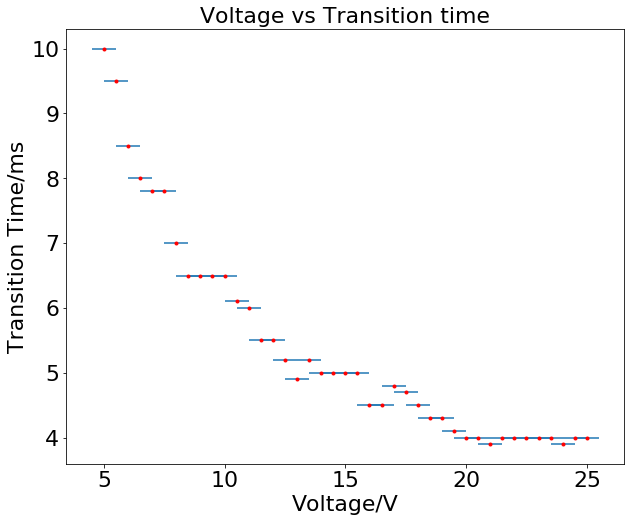

In [69]:
import os
import numpy as np
import matplotlib.pyplot as plt
params = {'legend.fontsize': '22',
          'figure.figsize': (10, 8),
         'axes.labelsize': '22',
         'axes.titlesize':'22',
         'xtick.labelsize':'22',
         'ytick.labelsize':'22'}
plt.rcParams.update(params)
FOLDER = r'Volt Speed'
COL_NAMES = ['Voltage/V', 'Voltage Error/V', 'Transition Time/s','Pulse duration','Avg','Std']
LINES_TO_SKIP = -1

def read_csv_files_in_folder(folder_name):
    folder_name = os.listdir(FOLDER)
    for idx, fn in enumerate(folder_name): #puts data in 3d stepping through file
        file_path = (FOLDER + os.sep + fn)
        a = np.genfromtxt(file_path, dtype = float,delimiter=',', skip_header=1)#finds the commas and skips title row
        if idx == 0:
            data = np.empty([a.shape[0],a.shape[1], len(folder_name)])
        data[:,:, idx] = a
    return data

a = read_csv_files_in_folder(FOLDER)
v = np.array(a[:,0])
v_err = np.array(a[:,1])
t = np.array(a[:,2])
d = np.array(a[:,3])
av = np.array(a[9::10,4,0])
st = np.array(a[9::10,5,0])/np.sqrt(10)
plt.plot(v[::10],av*10**3,'r.')
plt.errorbar(x=v[::10],y=av*10**3,yerr=st,xerr=v_err[::10],ls='None')
plt.title('Voltage vs Transition time')
plt.xlabel('Voltage/V')
plt.ylabel('Transition Time/ms')
plt.show()

0.005402439024390244
